Dataset loaded with shape: (100000, 20)
Accident_ID                     0
Date                            0
Time                            0
City                            0
Latitude                        0
Longitude                       0
Weather_Condition               0
Temperature_C                   0
Visibility_km                   0
Road_Condition                  0
Vehicle_Type                    0
Vehicles_Involved               0
Accident_Severity               0
Casualties                      0
Cause                           0
Camera_Footage_Available        0
GPS_Speed_kmph                  0
Smart_Sensor_Alert          24979
Accident_Reported_By            0
Response_Time_Minutes           0
dtype: int64


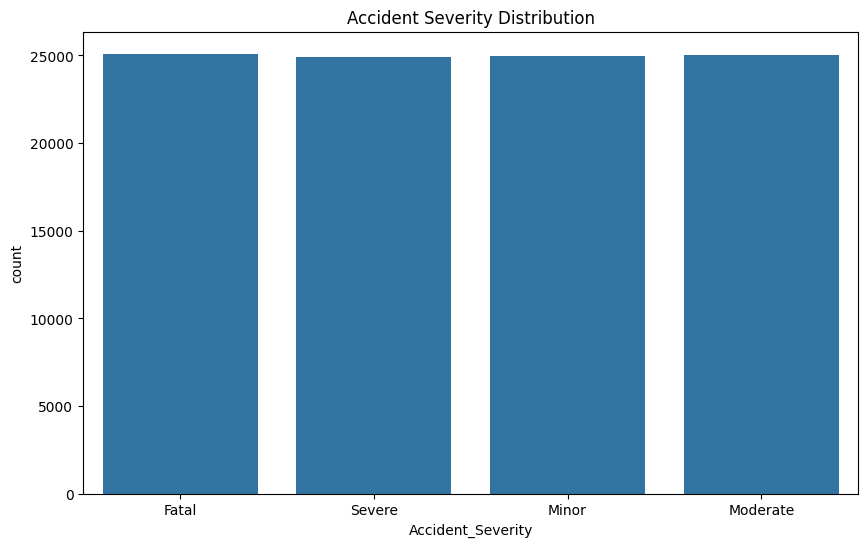

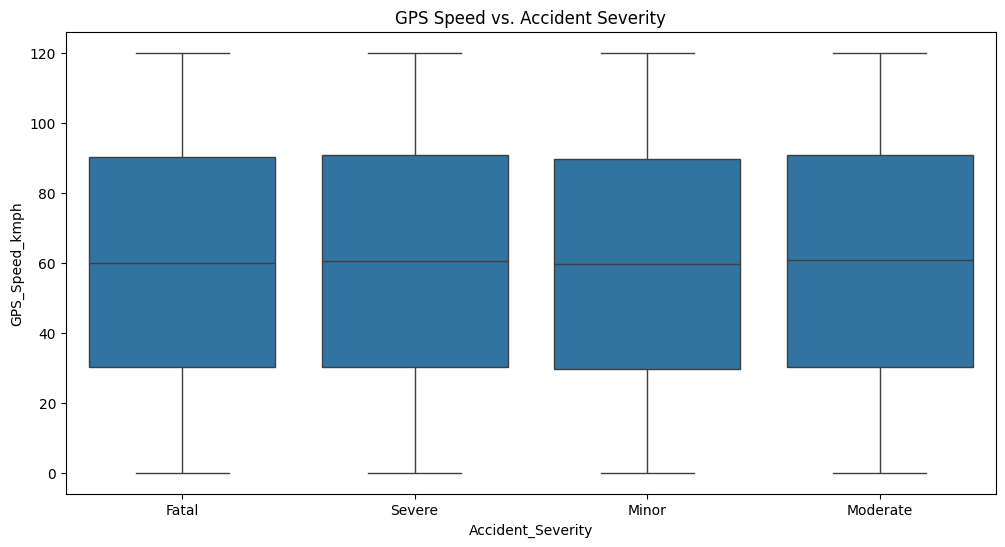

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Data Collection
path = "/enhanced_road_safety_dataset.csv"
df = pd.read_csv(path)
print("Dataset loaded with shape:", df.shape)

# 2. Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle any unrealistic GPS speed values
df = df[(df['GPS_Speed_kmph'] >= 0) & (df['GPS_Speed_kmph'] <= 150)]

# 3. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.countplot(x='Accident_Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Accident_Severity', y='GPS_Speed_kmph', data=df)
plt.title("GPS Speed vs. Accident Severity")
plt.show()

# 4. Feature Engineering
# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Select features and target
X = df.drop(columns=["Accident_ID", "Accident_Severity"])
y = df["Accident_Severity"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Model Building
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Visualization & Interpretation
importances = model.feature_importances_
features = df.drop(columns=["Accident_ID", "Accident_Severity"]).columns
feat_importances = pd.Series(importances, index=features)

plt.figure(figsize=(12,6))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()